# K-Nearest Neighbors Algorithm Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Up_Down'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'], 1, -1)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Up_Down
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1


In [4]:
X = dataset.iloc[ : , 1:4].values
y = dataset.iloc[ : , 6].values

In [15]:
# Normalize Data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[1:4]

array([[-0.63439667, -0.62549188, -0.6173066 ],
       [-0.59827322, -0.60246516, -0.59069658],
       [-0.58422521, -0.57734511, -0.58046196]])

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (937, 3) (937,)
Test set: (235, 3) (235,)


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(937, 3)
(937,)
(235, 3)
(235,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [9]:
# Predicting
yhat = neigh.predict(X_test)
yhat[1:4]

array([-1, -1, -1])

In [10]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6776947705442903
Test set Accuracy:  0.5574468085106383


In [19]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.6499466382070438
Test set Accuracy:  0.548936170212766


In [20]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49787234, 0.48085106, 0.56170213, 0.52765957, 0.54042553,
       0.54893617, 0.51489362, 0.51489362, 0.50212766])

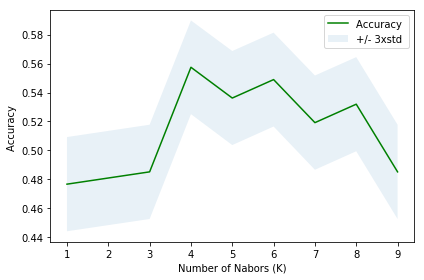

In [13]:
# Plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5574468085106383 with k= 4
